# Data Preprocessing

> Fill in a module description here

In [ ]:
#| default_exp preprocessing

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from esploco import esploco
from espresso import espresso
import os
import pickle
import pandas as pd

def preprocessData(input_path, output_path):
    for i in os.listdir(input_path):
        os.listdir(input_path)
        if i != '.DS_Store':
            datapath = input_path + '/' + i
            print(datapath)
            e = espresso(datapath, expt_duration_minutes=120)
            ele = esploco.esploco(datapath, 0, 120, companionEspObj = e)
            ele.calculatePeriFeedSpeed(
                e,
                monitorWindow=120,
                startSeconds=0,plotContrast=False)
            with open(output_path + i + '_ele.pickle', 'wb') as f:
                # Pickle the 'data' dictionary using the highest protocol available.
                pickle.dump(ele, f, pickle.HIGHEST_PROTOCOL)
                
            with open(output_path + i + '_e.pickle', 'wb') as f:
            # Pickle the 'data' dictionary using the highest protocol available.
                pickle.dump(e, f, pickle.HIGHEST_PROTOCOL)
            ele.calculateFallEvents()
            data = ele.resultsDf[['Temperature', 'Genotype', 'Status', 'ID', 'Starvedhrs', 'MealSizePerFly_µL',
           'AverageFeedSpeedPerFly_µl/s', 'MeanSpeed120sBeforeFeed_mm/s',
           'MeanSpeedDuringFeed_mm/s', 'MeanSpeed120sAfterFeed_mm/s',
           'MeanMealDurationPerFly_s', 'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
           'AverageFeedDurationPerFly_min', 'Latency_min',
           'duringBeforeSpeedRatio', 'afterBeforeSpeedRatio',
            'averageSpeed_mm/s', 'yPosition_mm', 'inLeftPort', 'inRightPort',
                                'falls',
                                'feedLogDate']]
            renamecolumns = {'Starvedhrs': 'Starvation', 
                     'MealSizePerFly_µL': 'Meal Size',
           'AverageFeedSpeedPerFly_µl/s' :'Feed Speed', 
                     'MeanSpeed120sBeforeFeed_mm/s': 'Prefeed Speed',
           'MeanSpeedDuringFeed_mm/s': 'Duringfeed Speed', 
                     'MeanSpeed120sAfterFeed_mm/s': 'Postfeed Speed',
           'MeanMealDurationPerFly_s': 'Meal Duration',
                     'AverageFeedVolumePerFly_µl': 'Volume', 
                     'AverageFeedCountPerFly': 'Count',
           'AverageFeedDurationPerFly_min': 'Duration', 
                     'Latency_min':'Latency',
           'duringBeforeSpeedRatio' : 'Duringfeed Speed Ratio',
                     'afterBeforeSpeedRatio': 'Perifeed Speed Ratio',
            'averageSpeed_mm/s' : 'Speed', 
                     'yPosition_mm': 'Height', 
                     'inLeftPort': 'Food Port Occupancy', 
                     'inRightPort': 'Ctrl Port Occupancy',
                     'falls': 'Falls', 
                                 'feedLogDate':'date' , 'Temperature': 'Light'}
    
            data = data.rename(columns = renamecolumns)
            data = data.drop(data.loc[data['Genotype']== 'Empty'].index, axis = 0)

            # data = data.drop(data.loc[np.isnan(data['Starvation'])].index, axis = 0)
            print(len(data))
            data.to_csv(output_path+ '/' + i + '_ele.csv', index = False)

/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/WT/W1118Dark


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


countLog files found: 

['CountLog_2023-03-29_15-44-48.csv' 'CountLog_2023-03-30_14-14-17.csv'
 'CountLog_2023-04-03_14-39-20.csv' 'CountLog_2023-04-18_14-57-49.csv'
 'CountLog_2023-06-23_15-02-43.csv' 'CountLog_2023-06-24_14-50-42.csv'
 'CountLog_2023-06-28_14-34-06.csv' 'CountLog_2023-06-28_16-45-55.csv'
 'CountLog_2023-06-29_15-08-07.csv' 'CountLog_2023-07-01_14-41-00.csv'
 'CountLog_2023-07-07_17-15-55.csv' 'CountLog_2023-08-11_16-23-52.csv'
 'CountLog_2023-10-18_17-58-41.csv' 'CountLog_2023-10-20_15-16-35.csv'
 'CountLog_2023-10-23_16-53-52.csv']

metaData files found: 

['MetaData_2023-03-29_15-44-48.csv' 'MetaData_2023-03-29_15-44-50.csv'
 'MetaData_2023-03-30_14-14-17.csv' 'MetaData_2023-03-30_14-14-19.csv'
 'MetaData_2023-04-03_14-39-20.csv' 'MetaData_2023-04-03_14-39-24.csv'
 'MetaData_2023-04-18_14-57-49.csv' 'MetaData_2023-04-18_14-57-52.csv'
 'MetaData_2023-06-23_15-02-43.csv' 'MetaData_2023-06-23_15-02-46.csv'
 'MetaData_2023-06-24_14-50-42.csv' 'MetaData_2023-06-24_14-50

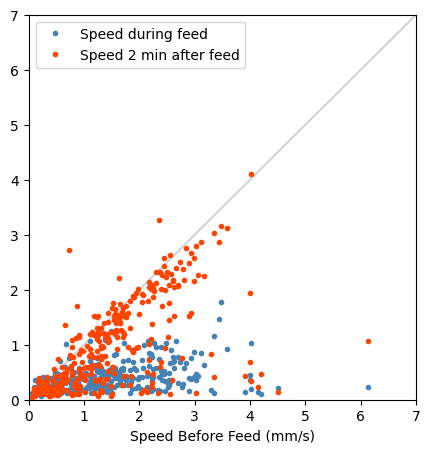

In [ ]:
datapaths = [
    # 'RNAi', 'Known Feeding Review', 'Main 5HT', 'Novel VNC Splits', 'Intersection', 
             'WT']
pickle_path = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/pickles/'
for i in datapaths:
    preprocessData('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/'+ i,
               pickle_path) 

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Known Feeding Review/NPFCsCh
countLog files found: 

['CountLog_2021-12-17_11-55-47.csv' 'CountLog_2023-12-28_15-47-23.csv']

metaData files found: 

['MetaData_2021-12-17_11-55-47.csv' 'MetaData_2023-12-28_15-47-23.csv'
 'MetaData_2023-12-28_15-47-26.csv']
portLocations files found: 

['PortLocations_2021-12-17_11-55-47.csv'
 'PortLocations_2023-12-28_15-47-26.csv']

feedLog files found: 

['FeedLog_2021-12-17_11-55-47.csv' 'FeedLog_2023-12-28_15-47-26.csv']
CountLog_2021-12-17_11-55-47.csv
MetaData_2021-12-17_11-55-47.csv


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-28_15-47-23.csv
MetaData_2023-12-28_15-47-23.csv
recalculating feed duration for feeds...

[-----------------------------------------------------------------------------]
putting feeds back into countlog...

[----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagona

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-12_16-29-00.csv
MetaData_2023-12-12_16-29-00.csv
CountLog_2023-12-29_15-42-49.csv
MetaData_2023-12-29_15-42-49.csv
recalculating feed duration for feeds...

[-------------------------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[---------]
Done
90
/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Known Feeding Review/Dilp2CsCh
countLog files found: 

['CountLog_2024-02-01_17-29-13.csv']

metaData files found: 

['MetaData_2024-02-01_17-29-13.csv' 'MetaData_2024-02-01_17-29-18.csv']
portLocations files found: 

['PortLocations_2024-02-01_17-29-18.csv']

feedLog files fo

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


recalculating feed duration for feeds...

[-----------------------------------------------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[---]
Done
30
/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Known Feeding Review/AKH3CsCh
countLog files found: 

['CountLog_2023-12-12_17-19-00.csv' 'CountLog_2023-12-14_15-30-26.csv'
 'CountLog_2023-12-27_14-55-51.csv' 'CountLog_2023-12-27_17-15-34.csv'
 'C

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-14_15-30-26.csv
MetaData_2023-12-14_15-30-26.csv
CountLog_2023-12-27_14-55-51.csv
MetaData_2023-12-27_14-55-51.csv
CountLog_2023-12-27_17-15-34.csv
MetaData_2023-12-27_17-15-34.csv
CountLog_2023-12-28_17-56-16.csv
MetaData_2023-12-28_17-56-16.csv
recalculating feed duration for feeds...

[-------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

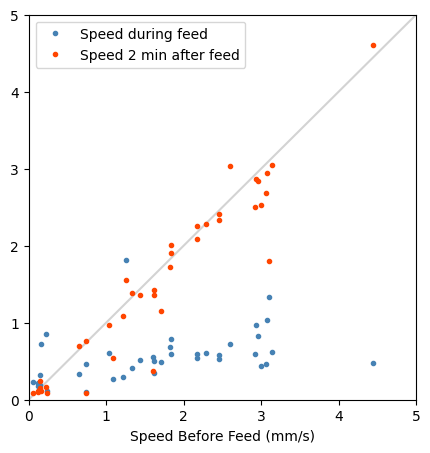

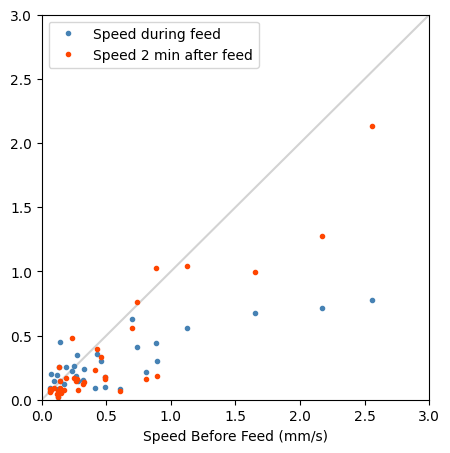

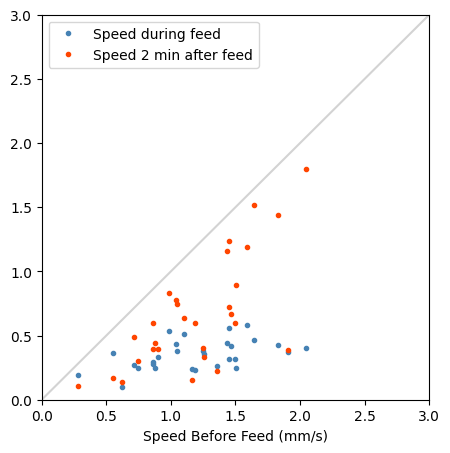

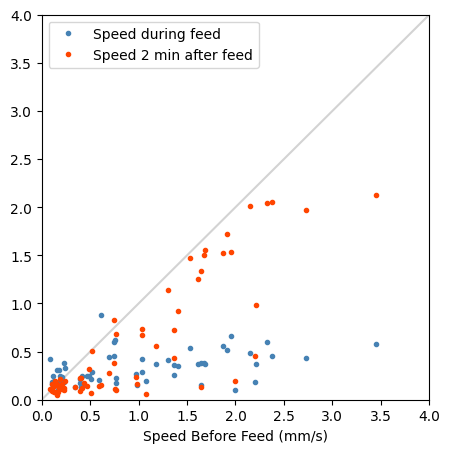

In [ ]:
    preprocessData('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/'
                   + 'Known Feeding Review',pickle_path) 
